# Finding Heavy Traffic Indicators on I-94

## Introduction

Goal of this project is to plot charts and graphs that display correlation between different factors that may affect traffic like weather, time of day, time of week etc

We use data from <a href=' https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume' a> Metro_Interstate_Traffic_Volume</a>

## Viewing Dataset

In [1]:
import pandas as pd
metro=pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [2]:
metro

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00,4918
...,...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,30-09-2018 19:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,30-09-2018 20:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,30-09-2018 21:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,30-09-2018 22:00,1450


In [3]:
metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## Distribution of Traffic Volume

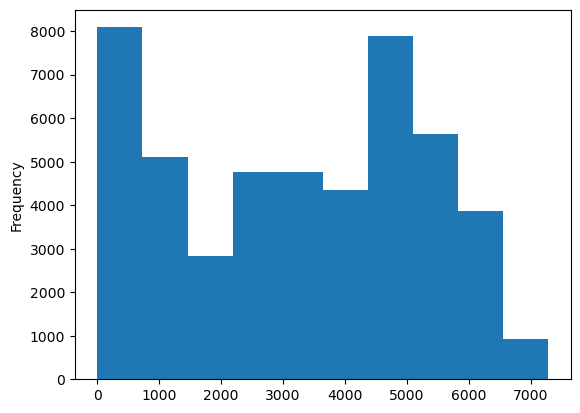

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [4]:
import matplotlib.pyplot as plt
# Need code below to see graph in notebook
%matplotlib inline
metro['traffic_volume'].plot.hist()
plt.show()
metro['traffic_volume'].describe()


## Factoring in Time

### Daytime and Nighttime

Here, we split dataset into daytime and nighttime to check whether the time of day influences our dataset

In [5]:
# Filtering data
metro['date_time']=pd.to_datetime(metro['date_time'],format="%d-%m-%Y %H:%M")
day = metro.copy()[(metro['date_time'].dt.hour >= 7) & (metro['date_time'].dt.hour < 19)]
night = metro.copy()[(metro['date_time'].dt.hour >= 19) | (metro['date_time'].dt.hour < 7)]


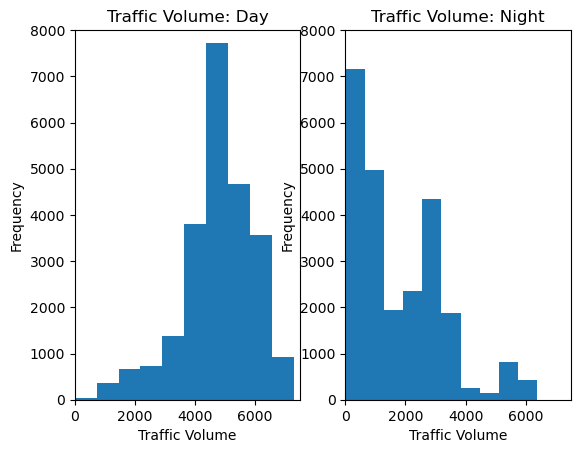

In [6]:
plt.figure()

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(0, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(0, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

During the day traffic volume tends to centred around 5000.

In contrast, traffic volume at night has a U-shape distribution from 0 to 3333 suggesting that traffic volume is either below 1000 or above 3000 (maybe on weekends or for specific events)

### Month

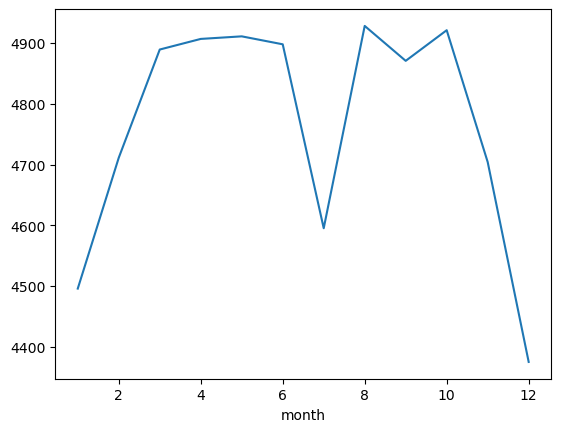

In [7]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean(numeric_only=True)
by_month['traffic_volume'].plot.line()
plt.show()

Traffic volume is always between 4300 to 5000 with a steep dip during November, December and July.

### Day of Week

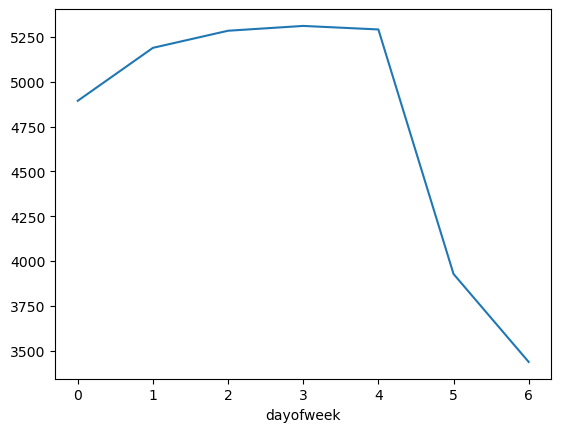

In [8]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean(numeric_only=True)
by_dayofweek['traffic_volume'].plot.line()
plt.show()

Traffic volume is clearly higher on weekdays

### Time of Day

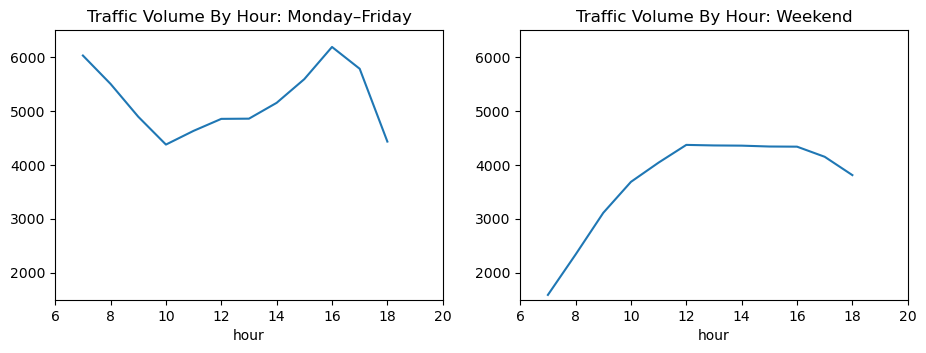

In [9]:
day['hour'] = day['date_time'].dt.hour
business_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 = Saturday
by_hour_business = business_days.groupby('hour').mean(numeric_only=True)
by_hour_weekend = weekend.groupby('hour').mean(numeric_only=True)


plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')
plt.show()

We can see that traffic volume is generally higher on weekdays with peak times being at 7, 16 (people commuting to work)

On weekends, traffic volume is generally low at start of day peaking at around lunchtime

## Correlation between traffic volume and weather

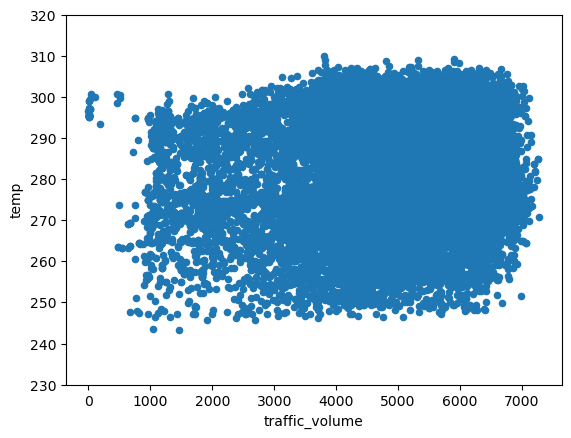

In [10]:
day.corr(numeric_only=True)['traffic_volume']
day.plot.scatter('traffic_volume', 'temp') 
plt.ylim(230, 320)
plt.show()

No correlation between temperature and traffic volume

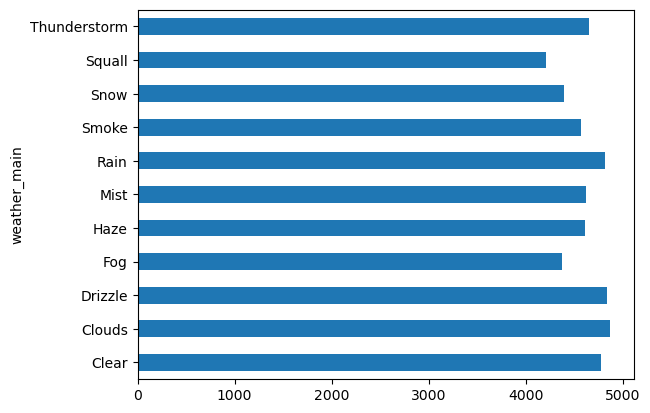

In [11]:
by_weather_main = day.groupby('weather_main').mean(numeric_only=True)
by_weather_main['traffic_volume'].plot.barh()
plt.show()

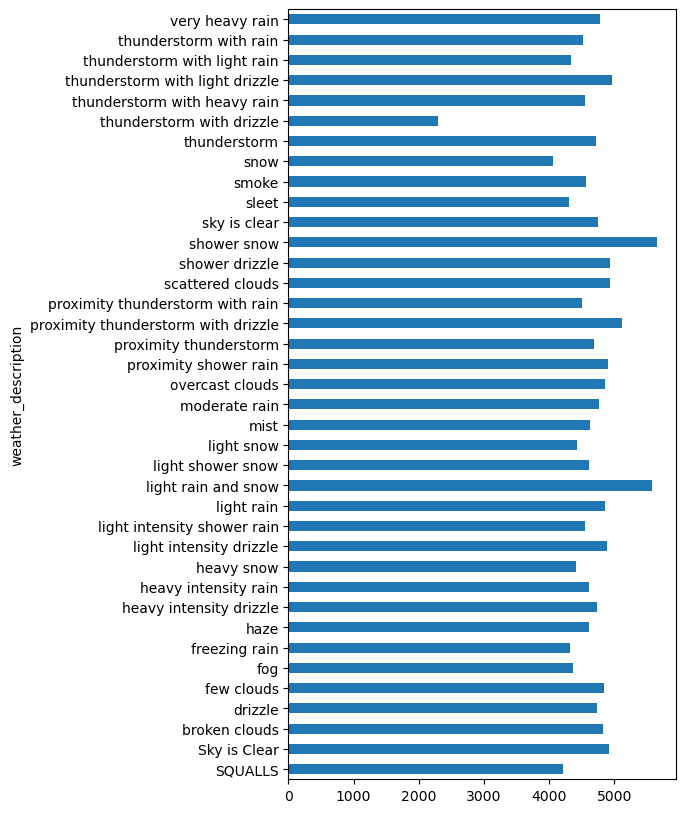

In [12]:
by_weather_description = day.groupby('weather_description').mean(numeric_only=True)
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

There is not much correlation between weather and traffic volume compared to other comparisons made in the project.

It appears snow is a slight outlier with traffic volume being over 5000 during 'shower snow' and 'light shower snow'

## Conclusions

The time of day (daytime, nighttime), and day of the week (weekday, weekend) have a lot bigger impact on traffic volume than the particular month or weather conditions.